In [110]:
# Scientific
import random
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import expon

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# ML
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Parallelization
from joblib import Parallel, delayed
from tqdm import tqdm

# Typing
from nptyping import NDArray, Float64, Shape

# Setting Notebook Options
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
seed = np.random.randint(0, 1e9)


In [124]:
from data_simulation.simulate_data import Experiment
exp1 = Experiment(cluster_number_range=(10,10))

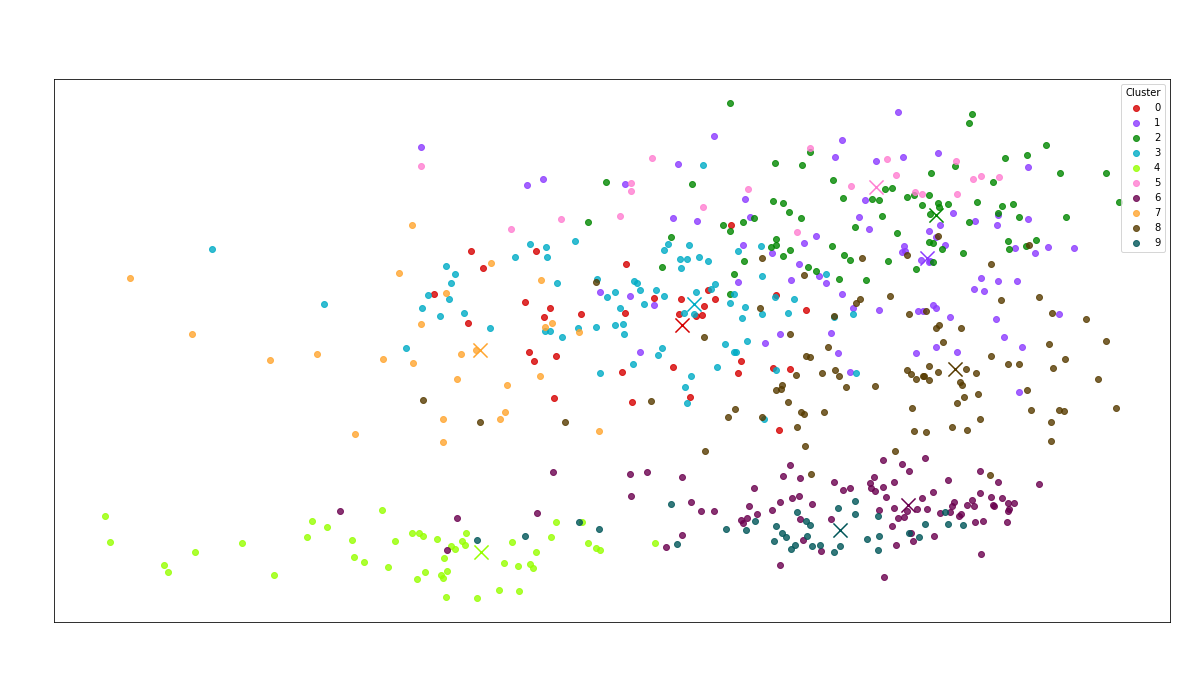

In [125]:
from plotting.plot_funcs import plot_cluster

plot_cluster(exp1.df, "cluster", title="True Clusters")

### Cluster initialization

In [126]:
from cluster_initialization.init_class import Cluster_initialization, Routine

cluster_init = Cluster_initialization(exp1.df, routine = Routine.random_inside)
params_array = cluster_init.init_params_array

Single Run

In [133]:
experiment = Experiment(cluster_number_range=(7,7))


cluster_init_params = {
    "N_cluster_max": 10,
    "N_runs_per_clusternumber": 5
}
cluster_init = Cluster_initialization(experiment.df, routine = Routine.random_inside)
cluster_init.sample(**cluster_init_params)
init_params = cluster_init.sampled_init_params_array[20]

em_params = {
    "max_iter": 200,
    "em_tol": 1e-5,
    "min_mix_coef": 0.02,
    "abs_tol_params": 1e-5
}


In [129]:
from em_algorithm.em_funcs import run_EM
#from em_algorithm.em_funcs_inline import run_EM as run_EM_inline
from em_algorithm.em_class import EM

In [134]:


em = EM(**em_params)
em.run(experiment.X, init_params) # for initialization purposes
i_time_class = em.execution_time
#a, i_time_func_inline = run_EM_inline(experiment.X, init_params, **em_params)    # # for initialization purposes
a, i_time_func = run_EM(experiment.X, init_params, **em_params)    # # for initialization purposes

print(f"{i_time_class =}")
print(f"{i_time_func =}")
#print(f"{i_time_func_inline =}")

i_time_class =6.582024300005287
i_time_func =6.606899799997336


In [117]:
em.inferred_mixtures

array([1.36363636e-01, 1.31418006e-03, 1.91816379e+00, 1.17920044e+00,
       7.95454545e-02, 2.45451297e-03, 3.38836320e+00, 1.17920044e+00,
       1.25000000e-01, 2.66065278e-03, 3.51332718e+00, 1.17920044e+00,
       7.95454545e-02, 3.27010927e-02, 2.65327291e+00, 1.17920044e+00,
       2.15909091e-01, 9.50767429e-03, 6.25618633e-01, 1.17920044e+00,
       1.13636364e-01, 2.76042482e-02, 9.66580911e-01, 1.17920044e+00,
       7.95454545e-02, 4.24259934e-02, 7.04215816e-01, 1.17920044e+00,
       1.02272727e-01, 5.56173960e-02, 7.70507909e-01, 1.17920044e+00,
       6.81818182e-02, 6.37253835e-02, 1.09682684e+00, 1.17920044e+00])

In [ ]:
#for init_params in cluster_init.sampled_init_params_array:#
#    results_funcs = run_EM(experiment.X, init_params, **em_params)

In [135]:
result_list = []
for init_params in cluster_init.sampled_init_params_array:
    results_class = em.run(experiment.X, init_params)    
    result_list.append(em.inferred_mixtures)

c:\Users\HydraJ\.conda\envs\ba22\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [137]:
for i in range(130):
    print(result_list[i][::4])

[1.]
[1.]
[1.]
[1.]
[1.]
[0.42032293 0.57967707]
[0.42023717 0.57976283]
[0.58130614 0.41869386]
[0.5 0.5]
[0.57992135 0.42007865]
[0.32534702 0.38631555 0.28833743]
[0.17656045 0.37161727 0.45182228]
[0.32539447 0.28823657 0.38636896]
[0.28831731 0.38632405 0.32535864]
[0.38628897 0.32531985 0.28839118]
[0.27931789 0.24842822 0.38900182 0.08325207]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.25 0.25 0.25 0.25]
[0.37674551 0.19110396 0.2796383  0.15251223]
[0.25703569 0.14286574 0.2382204  0.18866219 0.17321598]
[0.11926842 0.11925775 0.38372391 0.28661417 0.09113576]
[0.2142772  0.14779297 0.17655871 0.23311929 0.22825183]
[0.17847724 0.21070597 0.23020428 0.23852144 0.14209107]
[0.2 0.2 0.2 0.2 0.2]
[0.26567174 0.19587926 0.03428612 0.20004574 0.06746863 0.23664852]
[0.24623959 0.1256787  0.05602419 0.16906006 0.15434764 0.24864983]
[0.02       0.11237226 0.19702167 0.20100659 0.23505221 0.23454727]
[0.02       0.24270826 0.26533842 0.13864508 0.1580169  0.17529135]
[0.02       0.

IndexError: list index out of range

In [ ]:
#for init_params in cluster_init.sampled_init_params_array:
#    results_class = run_EM_inline(experiment.X, init_params, **em_params)    

In [ ]:
em.inferred_mixtures

array([1.25000000e-01, 2.21080403e-01, 5.60106793e+00, 1.95314833e+00,
       1.25000000e-01, 5.67776496e-03, 6.90674658e+00, 1.56915782e+00,
       1.25000000e-01, 4.77087342e-02, 3.76252704e+00, 9.55101650e-01,
       1.25000000e-01, 4.17444550e-01, 5.26953124e-01, 2.71386126e-01,
       1.25000000e-01, 2.73117079e-01, 1.65699277e+00, 3.79273530e-01,
       1.25000000e-01, 1.91454099e-02, 5.20557446e+00, 1.78574762e-01,
       1.25000000e-01, 6.28268982e-03, 6.04744056e+00, 1.06712745e+00,
       1.25000000e-01, 1.62313725e+00, 3.44646565e+00, 7.78391526e-01])

In [ ]:
cluster_init.sampled_init_params_array[-1]

array([1.25000000e-01, 2.21080403e-01, 5.60106793e+00, 1.95314833e+00,
       1.25000000e-01, 5.67776496e-03, 6.90674658e+00, 1.56915782e+00,
       1.25000000e-01, 4.77087342e-02, 3.76252704e+00, 9.55101650e-01,
       1.25000000e-01, 4.17444550e-01, 5.26953124e-01, 2.71386126e-01,
       1.25000000e-01, 2.73117079e-01, 1.65699277e+00, 3.79273530e-01,
       1.25000000e-01, 1.91454099e-02, 5.20557446e+00, 1.78574762e-01,
       1.25000000e-01, 6.28268982e-03, 6.04744056e+00, 1.06712745e+00,
       1.25000000e-01, 1.62313725e+00, 3.44646565e+00, 7.78391526e-01])

In [ ]:
from model_selection.run import model_selection_run

em_params = {
    "max_iter": 1000,
    "em_tol": 1e-5,
    "min_mix_coef": 0.02
}


parallel_params = {
    "n_jobs": 10
}

df_scores, results = model_selection_run(X, cluster_init, em_params, init_params, parallel_params)
print(sum(np.isnan(results["ll"])))

NameError: name 'X' is not defined

In [ ]:
max(df_scores.count_repeats)

48

In [ ]:
df_scores[df_scores.total_iter_steps > 999]

,param_index,iter_steps,execution_time,ll,total_execution_time,count_repeats,total_iter_steps,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank
37,83,1000,1.759068,-56.465460,1.781878,12,1012,68.465460,91.509310,80.231662,0.371172,171.904698,3,63,56,49,51,4,118,341,47,0.811695,38
38,79,1000,2.028721,-56.465479,2.028721,0,1000,68.465479,91.509329,80.231679,0.371172,171.904698,3,64,57,50,52,4,118,345,48,0.811695,39
39,78,1000,1.872950,-56.465632,1.884028,5,1005,68.465632,91.509482,80.231809,0.371172,171.904698,3,65,58,51,53,4,118,349,49,0.811695,40


In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment_single, select_prediction_df_single
param_idx = 119
criterion = "TOTAL_rank"
get_prediction_df_single(results, df_scores, exp1.df, criterion, param_idx=param_idx)

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,gamma_2,gamma_3,identified_as_cluster
0,0,0.111437,2.161013,0.490436,0,0.007825,3.267501,1.548979,2.877402,0.010152,2.492889,6.773833e-01,3.406650e-87,0.060466,2.621503e-01,3
1,0,0.111437,2.161013,0.490436,0,0.007825,3.267501,1.548979,2.877402,0.006504,2.002350,9.389923e-01,1.476535e-112,0.061008,1.169284e-07,3
2,0,0.111437,2.161013,0.490436,0,0.007825,3.267501,1.548979,2.877402,0.023864,1.586135,7.217137e-01,4.094928e-136,0.278286,1.073952e-19,3
3,0,0.111437,2.161013,0.490436,0,0.007825,3.267501,1.548979,2.877402,0.028048,1.704847,6.241502e-01,6.299462e-129,0.375850,3.117529e-15,3
4,0,0.111437,2.161013,0.490436,0,0.007825,3.267501,1.548979,2.877402,0.028123,1.860188,6.205198e-01,6.381842e-120,0.379480,2.107687e-10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,6,0.130108,3.264539,1.018417,2,0.143466,2.559218,1.120481,0.712060,0.203613,3.874829,4.187217e-08,2.263776e-33,1.000000,3.666905e-32,noise
340,6,0.130108,3.264539,1.018417,2,0.143466,2.559218,1.120481,0.712060,0.212428,2.117405,8.272906e-09,5.252103e-107,0.998661,1.339035e-03,noise
341,6,0.130108,3.264539,1.018417,2,0.143466,2.559218,1.120481,0.712060,0.107639,4.457933,1.427816e-03,3.938809e-17,0.998572,1.799783e-68,noise
342,6,0.130108,3.264539,1.018417,3,0.584026,2.578828,0.095852,1.650742,0.112903,2.406840,6.713357e-05,9.676357e-92,0.257863,7.420697e-01,1


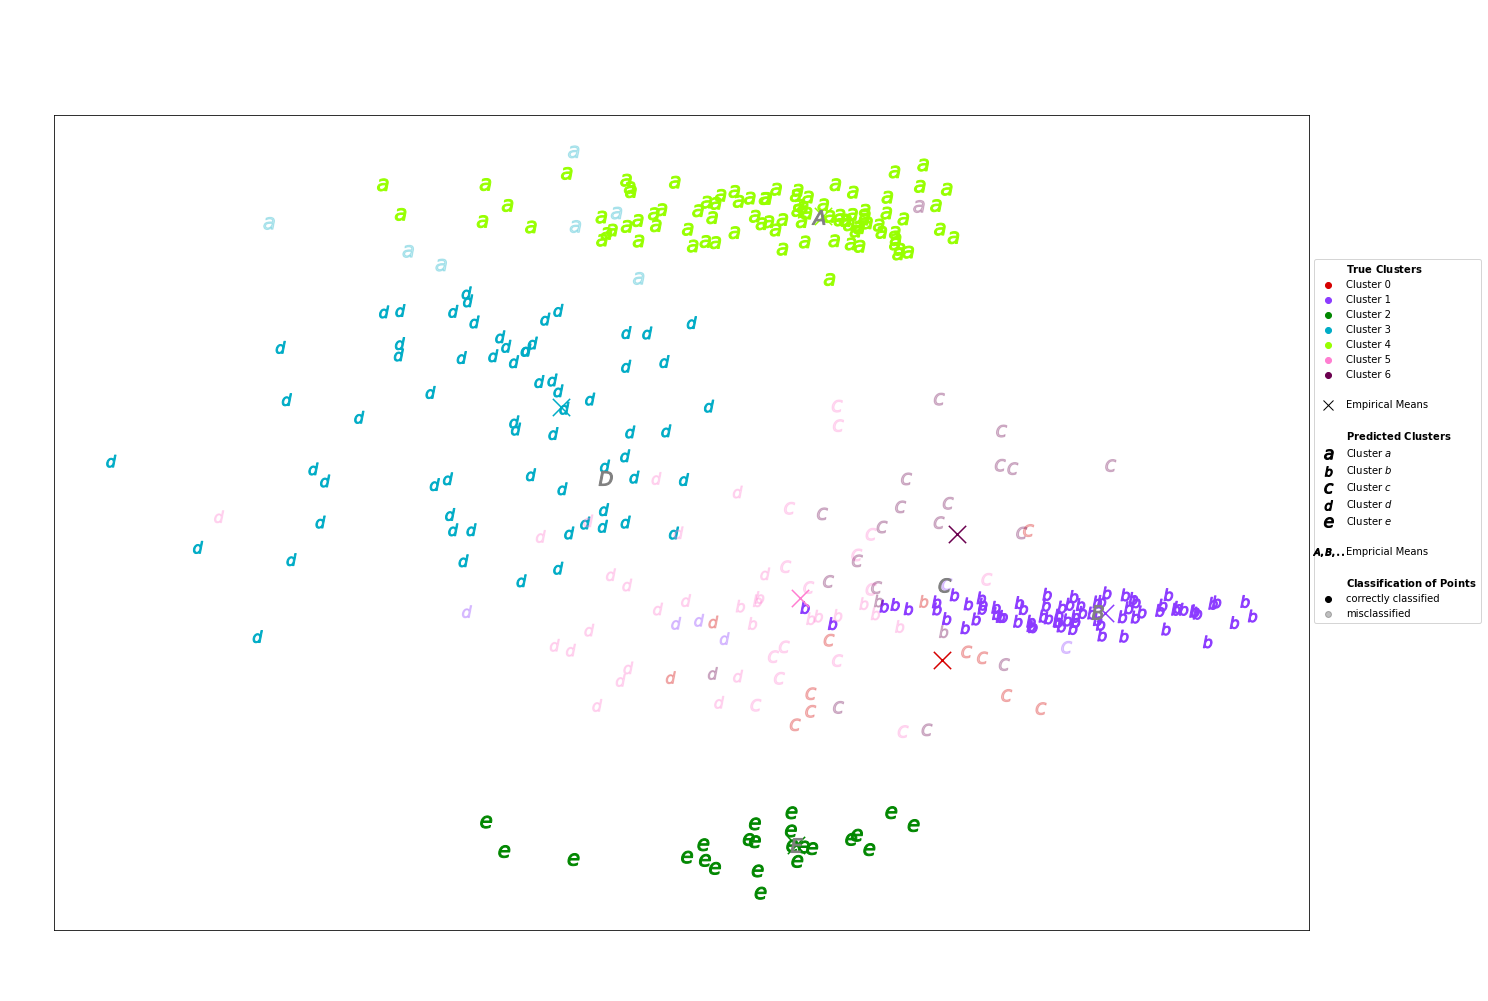

In [ ]:
from plotting.clustering_assessment.plot import plot_clustering_assessment_single, select_prediction_df_single
param_idx = 133
criterion = "TOTAL_rank"

plot_clustering_assessment_single(results, df_scores, exp1.df, criterion, param_idx=param_idx)

[0.19343786 0.06192382 0.1229532  0.10610538 0.34993206 0.16564767]


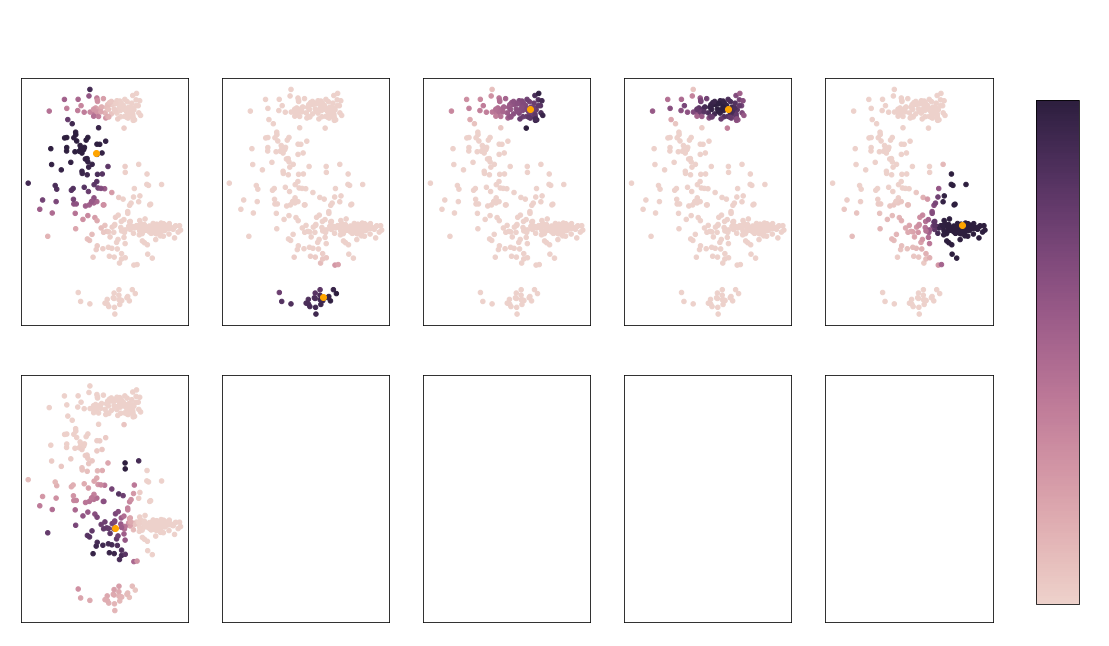

In [ ]:
print(results["params"][param_index][::4])
plot_responsibilities(exp1, results["params"][param_index])  # best AIC score

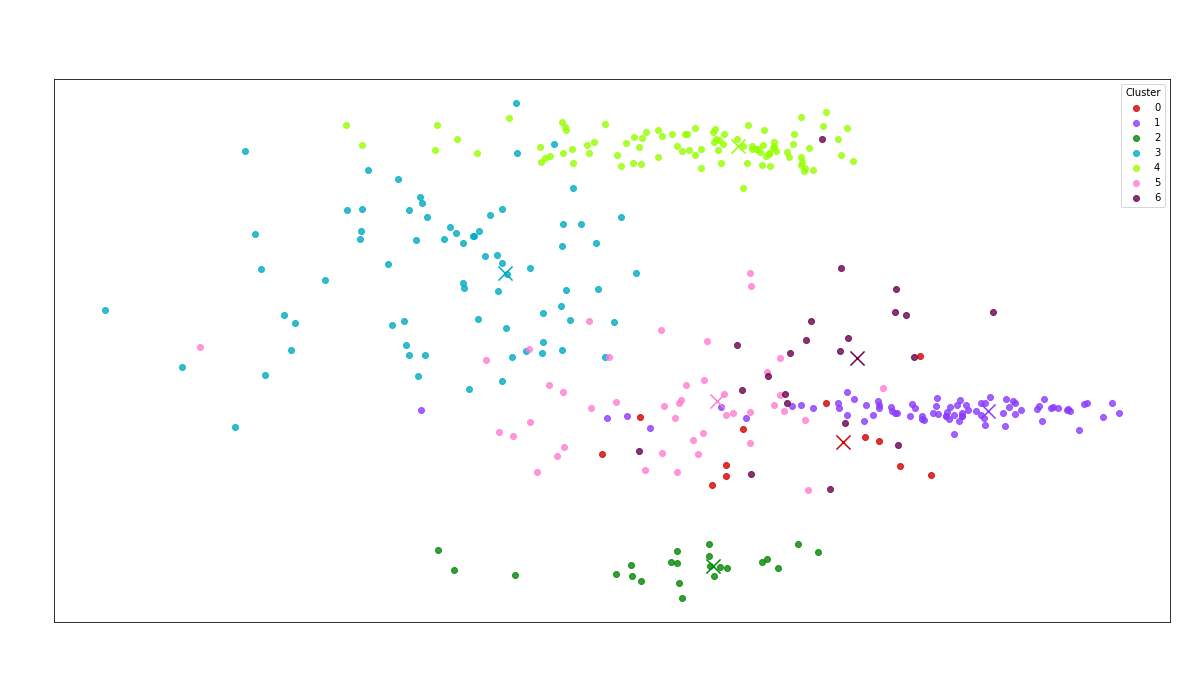

In [ ]:
plot_cluster(exp1.df, "cluster", title="True Clusters")

In [ ]:
from post_processing.identfy_clusters import get_prediction_df

df_pred = get_prediction_df(exp1.df.copy(), results, df_scores)

In [ ]:
df_pred.loc[0:0, :]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,gamma_2,gamma_3,gamma_4,identified_as_cluster
0,0,0.111437,2.161013,0.490436,1,0.563986,2.578616,0.094092,1.67448,0.090769,2.675473,1.880578e-24,0.796009,0.20399,5.302815e-07,1.388617e-34,1


In [ ]:
df_pred[df_pred.index==0]

,cluster,x_mean_og,y_mean_og,y_std_og,prediction_cluster,x_mean,y_mean,y_std,center_distance,x,y,gamma_0,gamma_1,gamma_2,gamma_3,gamma_4,identified_as_cluster
0,0,0.111437,2.161013,0.490436,1,0.563986,2.578616,0.094092,1.67448,0.090769,2.675473,1.880578e-24,0.796009,0.20399,5.302815e-07,1.388617e-34,1
